<a href="https://colab.research.google.com/github/saransh121/Kaggle/blob/main/stockscanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import yfinance as yf
import pytse_client as tse
import finpy_tse as fpy
import numpy as np
import pandas as pd
import talib as ta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
import talib


In [2]:
df = fpy.Get_Price_History(stock="آبادا", start_date='1400-01-01', end_date='1402-08-23',\
                          ignore_date=False, adjust_price=True, show_weekday=False, double_date=True)

In [3]:
df.head()

,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,Adj Open,Adj High,Adj Low,Adj Close,Adj Final
J-Date,,,,,,,,,,,,,,,,,
1400-01-07,2021-03-27,14400,14610,14320,14360,14340,3667833,52608358930,6840,آبادا,تولید نیروی برق آبادان,بورس,13043,13234,12971,13007,12989
1400-01-08,2021-03-28,14160,14570,14090,14350,14300,2709096,38694907270,6787,آبادا,تولید نیروی برق آبادان,بورس,12826,13197,12763,12998,12953
1400-01-10,2021-03-30,14350,14460,14130,14180,14290,2170996,30994613010,5993,آبادا,تولید نیروی برق آبادان,بورس,12998,13098,12799,12844,12944
1400-01-11,2021-03-31,14060,14250,14010,14010,14040,3823392,53682598420,4558,آبادا,تولید نیروی برق آبادان,بورس,12735,12908,12690,12690,12717
1400-01-14,2021-04-03,13870,14230,13760,13760,13900,2551748,35319878360,4538,آبادا,تولید نیروی برق آبادان,بورس,12563,12889,12464,12464,12590


In [4]:
df.reset_index(inplace=True)

In [5]:
df.head()

,J-Date,Date,Open,High,Low,Close,Final,Volume,Value,No,Ticker,Name,Market,Adj Open,Adj High,Adj Low,Adj Close,Adj Final
0,1400-01-07,2021-03-27,14400,14610,14320,14360,14340,3667833,52608358930,6840,آبادا,تولید نیروی برق آبادان,بورس,13043,13234,12971,13007,12989
1,1400-01-08,2021-03-28,14160,14570,14090,14350,14300,2709096,38694907270,6787,آبادا,تولید نیروی برق آبادان,بورس,12826,13197,12763,12998,12953
2,1400-01-10,2021-03-30,14350,14460,14130,14180,14290,2170996,30994613010,5993,آبادا,تولید نیروی برق آبادان,بورس,12998,13098,12799,12844,12944
3,1400-01-11,2021-03-31,14060,14250,14010,14010,14040,3823392,53682598420,4558,آبادا,تولید نیروی برق آبادان,بورس,12735,12908,12690,12690,12717
4,1400-01-14,2021-04-03,13870,14230,13760,13760,13900,2551748,35319878360,4538,آبادا,تولید نیروی برق آبادان,بورس,12563,12889,12464,12464,12590


In [9]:
df['day_of_week']=df['Date'].dt.day_of_week
df['dayofyear']=df['Date'].dt.dayofyear
df['days_in_month']=df['Date'].dt.days_in_month
df['is_month_start']=df['Date'].dt.is_month_start
df['is_year_start']=df['Date'].dt.is_year_start
df['dayofweek']=df['Date'].dt.dayofweek
df['month']=df['Date'].dt.month

In [13]:
df.drop(columns=['Date','J-Date','Ticker','Name','No','Market'],inplace=True)

In [15]:
df['days_in_month'].value_counts()

days_in_month
31    363
30    204
28     36
Name: count, dtype: int64

In [16]:
df['days_in_month'] = df['days_in_month'].replace({31:1,30:2,28:0})

In [17]:
df['days_in_month'].value_counts()

days_in_month
1    363
2    204
0     36
Name: count, dtype: int64

In [18]:
df[['is_month_start',	'is_year_start']] = df[['is_month_start',	'is_year_start']].replace({False:0,True:1})

In [20]:
def find_percentage(val1,val2):
  dif = val1-val2
  value = (val1+val2)/2
  diff = (dif/value)*100
  diff = 0 if np.isnan(diff) else diff
  return (dif/value)*100

In [22]:
# df['high_low_difference'] = df['High'] - df['Low']
df['high_low_difference_precentage'] = df.apply(lambda x: find_percentage(x['High'], x['Low']),axis=1)

# df['open_high_difference'] = df['Open'] - df['High']
df['open_high_difference_precentage'] = df.apply(lambda x: find_percentage(x['Open'], x['High']),axis=1)

# df['open_low_difference'] = df['Open'] - df['Low']
df['open_low_difference_precentage'] = df.apply(lambda x : find_percentage(x.Open,x.Low),axis=1)

# df['open_close_difference'] = df['Open'] - df['Close']
df['open_close_difference_percentage'] = df.apply(lambda x : find_percentage(x.Open,x.Close),axis=1)

# df['High_close_difference'] = df['High'] - df['Close']
df['High_close_difference_percentage'] = df.apply(lambda x : find_percentage(x.High,x.Close),axis=1)

# df['low_close_difference'] = df['Low'] - df['Close']
df['low_close_difference_percentage'] = df.apply(lambda x : find_percentage(x.Low,x.Close),axis=1)

In [23]:
df.shape

(603, 25)

In [24]:
pd.set_option('display.max_columns',100)

In [25]:
df.tail()

,Open,High,Low,Close,Final,Volume,Value,Adj Open,Adj High,Adj Low,Adj Close,Adj Final,day_of_week,dayofyear,days_in_month,is_month_start,is_year_start,dayofweek,month,high_low_difference_precentage,open_high_difference_precentage,open_low_difference_precentage,open_close_difference_percentage,High_close_difference_percentage,low_close_difference_percentage
598,10170,10360,9940,10360,10310,2081720,21456230410,10170,10360,9940,10360,10310,0,310,2,0,0,0,11,4.137931,-1.850950,2.287419,-1.850950,0.000000,-4.137931
599,10380,10630,10380,10400,10470,1330663,13974595350,10380,10630,10380,10400,10470,1,311,2,0,0,1,11,2.379819,-2.379819,0.000000,-0.192493,2.187351,-0.192493
600,10460,10460,10100,10200,10310,1261833,12956506920,10460,10460,10100,10200,10310,2,312,2,0,0,2,11,3.501946,0.000000,3.501946,2.516941,2.516941,-0.985222
601,10320,10570,10220,10240,10340,994734,10302749270,10320,10570,10220,10240,10340,0,317,2,0,0,0,11,3.367003,-2.393490,0.973710,0.778210,3.171552,-0.195503
602,10130,10220,9830,10110,10040,2025283,20341347120,10130,10220,9830,10110,10040,1,318,2,0,0,1,11,3.890274,-0.884521,3.006012,0.197628,1.082145,-2.808425


In [30]:
df.loc[df.adj_close_training.isna()]

df.dropna(inplace=True)

In [31]:
df.shape

(601, 26)

In [32]:
import seaborn as sns

In [33]:
from keras.models import Sequential
from keras.layers import Dense,InputLayer,LSTM,BatchNormalization,Dropout

In [34]:
# df.drop(columns=['High','Low'],inplace=True)

In [37]:
x = df.drop(columns=['Adj Close','adj_close_training'])
y = df['adj_close_training']

In [38]:
x = np.asanyarray(x)
y = np.asanyarray(y)
# x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=56)

In [44]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((480, 24), (121, 24), (480, 1), (121, 1))

In [49]:
model = Sequential()
model.add(LSTM(128,activation='tanh',input_shape=(24,1),return_sequences=True))
model.add(LSTM(64,activation='tanh'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='linear'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 200)               13000     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 149,169
Trainable params: 149,169
Non-trainable params: 0
_________________________________________________________________


In [51]:
from keras.optimizers import Adam
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='mean_squared_error',metrics=['mae'])

In [52]:
model_history = model.fit(x_train,y_train,batch_size=64,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
8/8 [==============================] - 3s 114ms/step - loss: 129043144.0000 - mae: 11165.7998 - val_loss: 127038104.0000 - val_mae: 11053.4688
Epoch 2/100
8/8 [==============================] - 0s 27ms/step - loss: 128974648.0000 - mae: 11162.9102 - val_loss: 126884968.0000 - val_mae: 11046.9092
Epoch 3/100
8/8 [==============================] - 0s 29ms/step - loss: 128741552.0000 - mae: 11153.0098 - val_loss: 126562152.0000 - val_mae: 11033.1475
Epoch 4/100
8/8 [==============================] - 0s 27ms/step - loss: 128284968.0000 - mae: 11133.5781 - val_loss: 125931648.0000 - val_mae: 11005.9941
Epoch 5/100
8/8 [==============================] - 0s 28ms/step - loss: 127465880.0000 - mae: 11098.2090 - val_loss: 124888656.0000 - val_mae: 10960.4688
Epoch 6/100
8/8 [==============================] - 0s 26ms/step - loss: 126204576.0000 - mae: 11043.3125 - val_loss: 123453200.0000 - val_mae: 10898.0508
Epoch 7/100
8/8 [==============================] - 0s 28ms/step - loss: 124

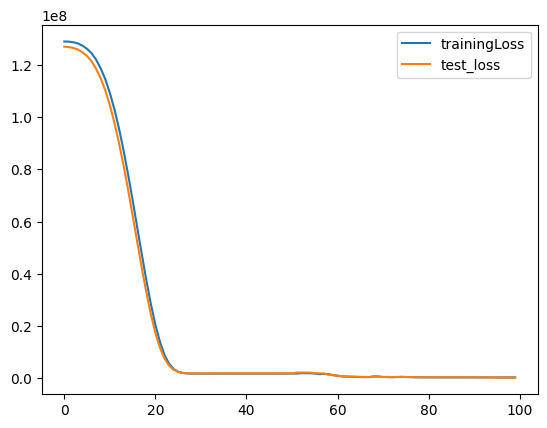

In [53]:
plt.plot(model_history.history['loss'],label="trainingLoss")
plt.plot(model_history.history['val_loss'],label ='test_loss')
plt.legend()

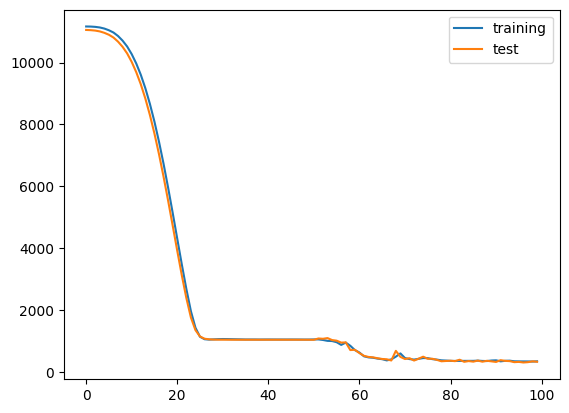

In [54]:
plt.plot(model_history.history['mae'],label="training")
plt.plot(model_history.history['val_mae'],label ='test')
plt.legend()

4/4 [==============================] - 1s 12ms/step


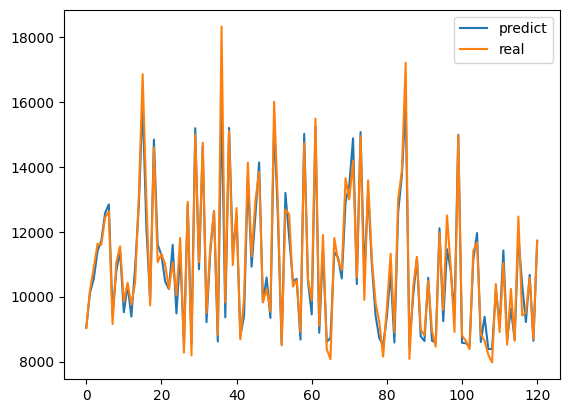

In [55]:
plt.plot(model.predict(x_test),label="predict")
plt.plot(y_test,label='real')
plt.legend()

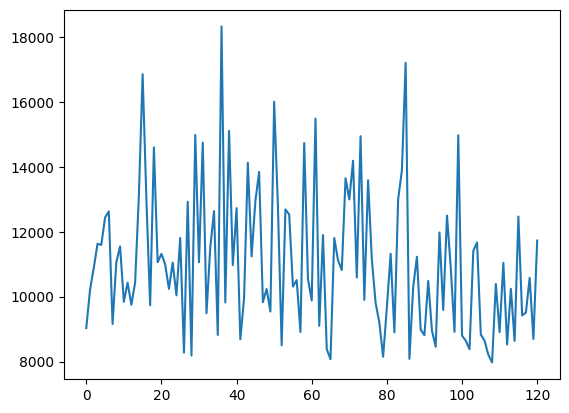

In [56]:
plt.plot(y_test,label='real')

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
pred_ = model.predict(x_test)

4/4 [==============================] - 0s 10ms/step


In [59]:
mean_absolute_error(pred_,y_test)

327.86324896694214

In [ ]:
# pred_.fla

In [61]:
df2=pd.DataFrame({"prd":pred_.flatten(),"real":y_test.flatten()})

In [62]:
df2

,prd,real
0,9052.419922,9029.0
1,10123.534180,10210.0
2,10550.263672,10890.0
3,11406.938477,11630.0
4,11720.906250,11595.0
...,...,...
116,10370.188477,9420.0
117,9215.326172,9510.0
118,10669.772461,10580.0
119,8637.213867,8694.0


In [63]:
df2["real"]=df2["real"].pct_change()
df2['real']=np.where(df2["real"]>0,1,-1)
df2["prd"]=df2["prd"].pct_change()
df2['prd']=np.where(df2["prd"]>0,1,-1)

In [67]:
pred_accu = round(np.sum(df2["real"]*df2["prd"] > 0) / len(df2["real"]), 2)
print('Prediction_Accuracy:', pred_accu)

Prediction_Accuracy: 0.95
